In [1]:
#Importing necessary libraries
import math
import numpy as np
from sklearn import datasets
import statistics
from statistics import mode
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

AttributeError: module 'types' has no attribute 'UnionType'

In [60]:
# # Loading iris dataset
# iris = datasets.load_iris()
# tempX, tempY= iris.data, iris.target
# m = tempX.shape[0]

# tempY = tempY.reshape(150,1)
# print(tempX.shape)
# print(tempY.shape)

In [61]:
# # Random Shuffle
# x_y = np.concatenate((tempX,tempY),axis = 1)
# np.random.shuffle(x_y)
# print(x_y.shape)

# x = x_y[:,:4]
# y = x_y[:,4]

# print(x_y.shape)
# print(x.shape)
# print(y.shape)

In [62]:
# # Splitting the dataset into train and test set

# m_train = 120
# m_test = m - m_train

# print(m_train)
# print(m_test)

# trainData = x[:m_train,:]
# testData = x[m_train:,:]

# trainLabels = y[:m_train]
# testLabels = y[m_train:]

# print(trainData.shape)
# print(testData.shape)
# print(trainLabels.shape)
# print(testLabels.shape)

In [63]:
# Implementing KNN as a class
class KNN:
    def __init__(self,k=3,p=2):
        self.k = k
        self.p = p
        
    def fit(self,x,y):
        self.trainData = x
        self.trainLabels = y
    
    def predict(self,testData,testLabels):
        predictedLables = [-1 for q in range(m_test)]
        
        #Testing for each test sample
        for i in range(m_test):
            
#             distList = [0 for q in range(m_train)]
#             for j in range(m_train):
#                 #Finding Distance from each training sample
#                 distList[j] = self.euclideanDist(testData[i], self.trainData[j])
            
            # LIST COMPREHENSION
            distList = [self.dist(testData[i], self.trainData[j]) for j in range(m_train)]
            
            
            tempTrainLabels = self.trainLabels
            
            distList = np.array(distList)
            tempTrainLabels = np.array(tempTrainLabels)
            
            # Sorting; increasing order of distance
            idx = distList.argsort()   
            distList = distList[idx]
            tempTrainLabels = tempTrainLabels[idx]
    
            # Extracting first k lables
            tempTrainLabels = tempTrainLabels[:self.k]
            predictedLables[i] = self.findLabel(tempTrainLabels)
            
        #Finding Accuracy
        correctPrediction = 0
        for i in range(m_test):
            if(predictedLables[i] == testLabels[i]):
                correctPrediction += 1
        acc = (correctPrediction/m_test * 100)
#         print("Accuracy =", acc )
        return acc
            
    def findLabel(self,tempList):
        return(mode(tempList))
    
    def euclideanDist(self, x, y):
        return np.sqrt(np.sum((x-y)**2))

    def dist(self,x,y):
        dist = 0
        for i in range(len(x)):
            dist += (x[i]-y[i])**self.p
        return (dist)**(1/self.p)
        

In [64]:
# Plot comparing value of k and the corresponding accuracy

# flag = 0 -> Curve for k vs accuracy
# flag = 1 -> Curve for p vs accuracy
def plotAccCurve(y,flag = 0):
    x = [(i+1) for i in range(0,len(y))]

    # Plotting the Graph
    plt.plot(x, y)
    plt.title("Accuracy Curve")
    if (flag == 1):
        plt.xlabel("p(Distance Metric)")
        plt.ylabel("Accuracy: p vs accuracy")
    else:
        plt.xlabel("k")
        plt.ylabel("Accuracy: k vs accuracy")
    plt.show()    

In [65]:
# Loading iris dataset
iris = datasets.load_iris()
tempX, tempY= iris.data, iris.target
m = tempX.shape[0]
trainData,testData, trainLabels, testLabels = train_test_split(tempX, tempY, test_size = 0.2, random_state = 1234)

print(trainData.shape)
print(testData.shape)
print(trainLabels.shape)
print(testLabels.shape)

m_train = trainData.shape[0]
m_test = m - m_train

(120, 4)
(30, 4)
(120,)
(30,)


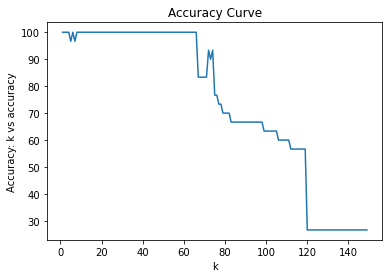

In [66]:
# Using KNN Class to predict labels
#Plotting k vs accuracy
accList = []
for z in range(1,150):
    obj = KNN(z)
    obj.fit(trainData,trainLabels)
    accList.append(obj.predict(testData,testLabels))
    
plotAccCurve(accList)

Accuracy degrades with increase in value of k; It is observed that for k>60 for this particular dataset, the accuracy of the KNN drops significantly.

C:\Users\ujjaw\AppData\Local\Temp/ipykernel_13308/228799801.py:59: RuntimeWarning: invalid value encountered in double_scalars
  return (dist)**(1/self.p)


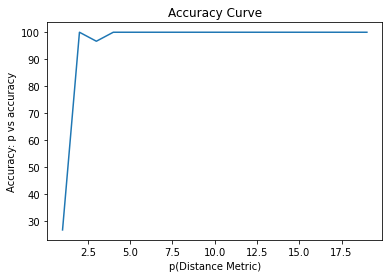

In [67]:
# Using KNN Class to predict labels
#Plotting p vs accuracy
accList = []
for p in range(1,20):
    obj = KNN(3, p)
    obj.fit(trainData,trainLabels)
    accList.append(obj.predict(testData,testLabels))
    
plotAccCurve(accList,1)

Accuracy remains almost the same for p >= 2. For p = 1, the accuracy is very bad, but for other p, it is similar to using euclidean distance. Hence, we use euclidean distance as it gives best accuracy with lesser mathematical complexity.